<a href="https://colab.research.google.com/github/strawndri/data-visualization/blob/main/Notebooks/Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [3]:
import pandas as pd

!pip install seaborn
import seaborn as sns

#Base de Dados

In [4]:
url = 'https://raw.githubusercontent.com/strawndri/data-visualization/main/Data/tips.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

##Colunas

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {'total_bill': 'valor_da_conta',
            'tip': 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time': 'horario',
            'size': 'total_pessoas'}

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


##Linhas

In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
valores_sobremesa = {
    'No': 'Não',
    'Yes': 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(valores_sobremesa)



---



In [11]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
valores_dia_da_semana = {'Sun': 'Domingo', 
                         'Sat': 'Sábado',
                         'Thur': 'Quinta',
                         'Fri': 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(valores_dia_da_semana)



---



In [13]:
gorjetas.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
valores_horario = {
    'Dinner': 'Janta',
     'Lunch': 'Almoço'
}

gorjetas.horario = gorjetas.horario.map(valores_horario)

In [15]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


# Análise I

In [16]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


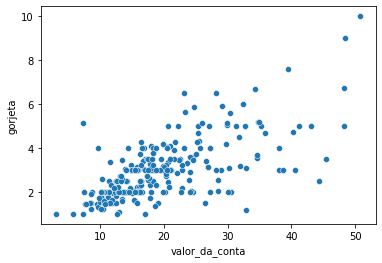

In [19]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

Quanto maior é o valor da conta paga, maior é a taxa de gorjeta.

## Quantidade de resultados

In [24]:
gorjetas.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia_da_semana     244
horario           244
total_pessoas     244
dtype: int64

In [25]:
print(f"A base de dados contém {gorjetas.shape[0]} casos registrados (corretamente).")

A base de dados contém 244 casos registrados (corretamente).


## Porcentagem

In [36]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [37]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas,Porcentagem,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15,0.15


### Gráfico I

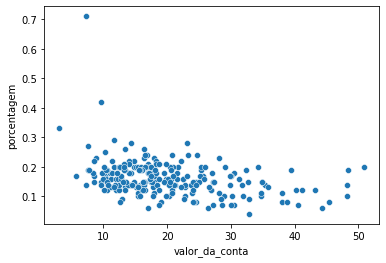

In [38]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", data=gorjetas)

Percebe-se que o valor pago não é proporcional a porcentagem, que está relacionando o **valor da conta** e a **gorjeta**.

### Gráfico II

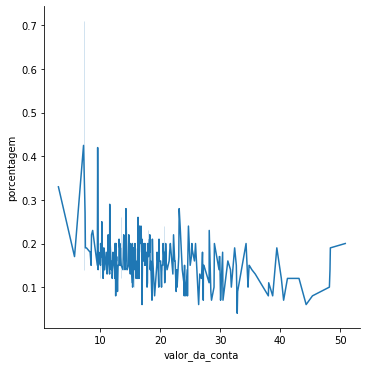

In [41]:
porcentagem_conta2 = sns.relplot(x="valor_da_conta", y="porcentagem", kind="line", data=gorjetas)

### Gráfico III

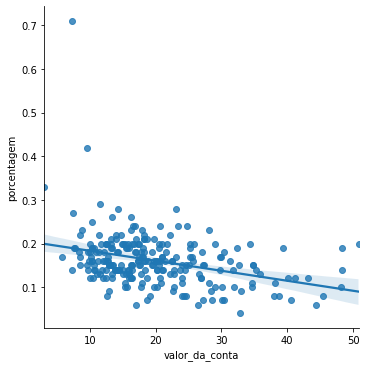

In [43]:
porcentagem_conta3 = sns.lmplot(x="valor_da_conta", y="porcentagem", data=gorjetas)